In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn
import seaborn as sns

C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
training_data = cmn.get_stringless_training_data()
testing_data = cmn.get_stringless_testing_data()
display(training_data.head(), testing_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [3]:
X_train = training_data.iloc[:,:-1]
y_train = training_data.iloc[:,-1:]
display(X_train.shape, X_train.head(), y_train.shape, y_train.head())

(1460, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


(1460, 1)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [4]:
X_test = testing_data
y_test = []
display(X_test.shape, X_test.head(), y_test)

(1459, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


[]

# XGB Cross Validation  for better parameter estimates

In [5]:
xgb = XGBRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [6]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10]
gamma = [i/100 for i in range(0,100,10)]
reg_alpha = [i/100 for i in range(0,100,10)]
reg_lamda = [i/100 for i in range(1,100,10)]
min_child_weight = [i/100 for i in range(0,100,10)]
subsample = [i/100 for i in range(1,100,10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
tree_method = ['auto', 'exact', 'approx', 'hist']
objective = ['reg:squarederror', 'reg:squaredlogerror', 'reg:logistic', 'reg:pseudohubererror', 'reg:absoluteerror']
# Create the random grid
random_grid = {'gamma': gamma,
                 'learning_rate': learning_rate,
                 'max_depth': max_depth,
                 'min_child_weight': min_child_weight,
                 'n_estimators': n_estimators,
                 'objective': objective,
                 'subsample': subsample,
                 'tree_method': tree_method}
pprint(random_grid)

{'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_child_weight': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'objective': ['reg:squarederror',
               'reg:squaredlogerror',
               'reg:logistic',
               'reg:pseudohubererror',
               'reg:absoluteerror'],
 'subsample': [0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91],
 'tree_method': ['auto', 'exact', 'approx', 'hist']}


In [7]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = XGBRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xgb_random.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\xgboost\sklearn.py", line 789, in fit
    self._Booster = tr

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                        'min_child_weight': [0.0, 0.1, 0.2, 0.3,
                                                             0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'objective': ['reg:squarederror',
                                                      'reg:squaredlogerror',
                                                      'reg:logistic',
                                                      'reg:pseudohubererror',
                                                      'reg:absoluteerror'],
                                        'subsample': [0.01, 0.11, 0.21, 0.31,
                                                      0.41, 0.51, 0.61, 0.71,
                                                      0.81, 0.91],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=42, verbose=2)

In [8]:
xgb_random.best_params_

{'tree_method': 'exact',
 'subsample': 0.81,
 'objective': 'reg:squarederror',
 'n_estimators': 800,
 'min_child_weight': 0.2,
 'max_depth': 100,
 'learning_rate': 0.01,
 'gamma': 0.5}

In [9]:
xgb = xgb_random.best_estimator_
xgb.fit(X_train, np.ravel(y_train))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=100, min_child_weight=0.2, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=24,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.81,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
print("model score on training data:", xgb.score(X_train, y_train))
y_predicted = xgb.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.999875385102716


array([122261.78, 149681.34, 179451.86, ..., 158219.88,  97884.72,
       230687.48], dtype=float32)

### XBR Feature Importance

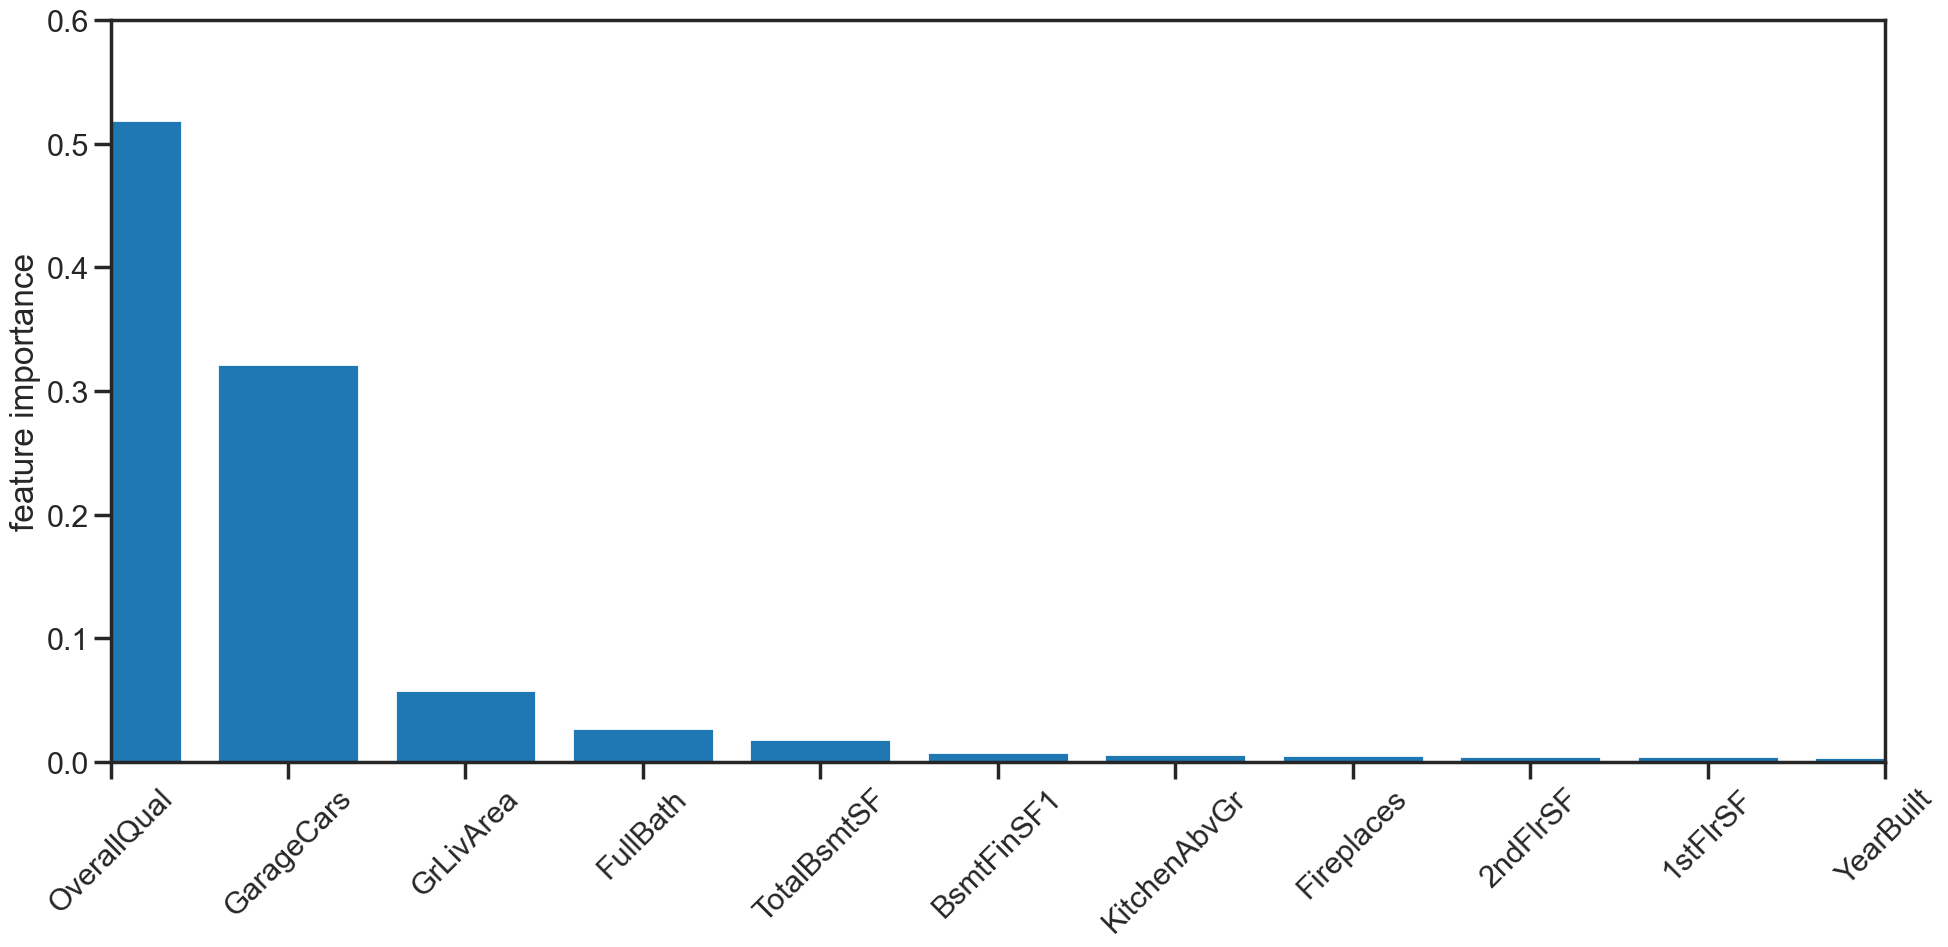

In [25]:
sns.set_context("poster")
sns.set_style("ticks")
cmn.plot_feature_importance(x_val=X_train, regressor=xgb, x_lim=10, y_lim=0.6, fig_size=(20,10))
plt.show()

In [12]:
pd.DataFrame(y_predicted).to_csv(f"{cmn.export_data_path}XGB_for_weights.csv")

# Reverse with best params

In [13]:
xgb = xgb_random.best_estimator_
xgb.fit(X_test, y_predicted)

C:\Users\alexa\mambaforge\envs\HousingProject\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=100, min_child_weight=0.2, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=24,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.81,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
print("model score on training data:", xgb.score(X_test, y_predicted))
print("model score on test data:", xgb.score(X_train, y_train))

model score on training data: 0.9999180030691676
model score on test data: 0.8824185758272136


In [15]:
y_train_predicted = xgb.predict(X_train)
y_train_predicted

array([197047.84, 160523.31, 207541.17, ..., 227436.6 , 118809.81,
       138959.31], dtype=float32)

In [16]:
pd.DataFrame(y_train_predicted).to_csv(f"{cmn.export_data_path}XGB.csv")

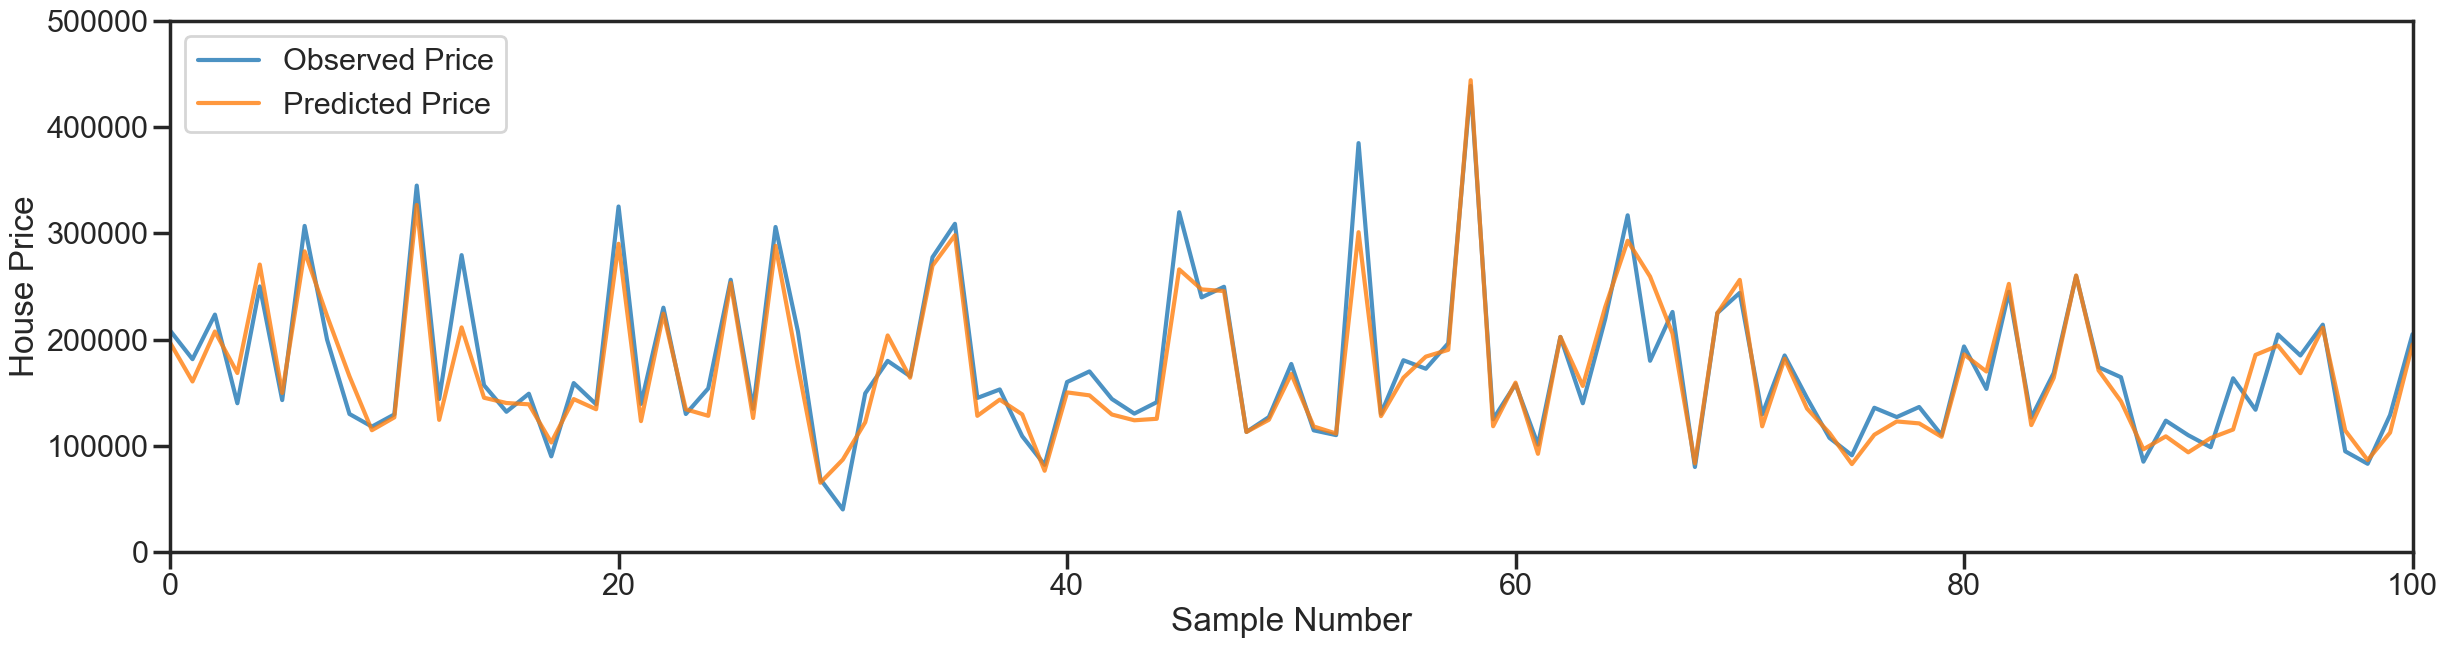

In [17]:
sns.set_context("poster")
sns.set_style("ticks")
cmn.plot_observed_vs_predicted(observed=y_train, predicted=y_train_predicted, x_lim=100, size_of_fig=(25, 7))

In [18]:
y_train

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [19]:
y_train_predicted

array([197047.84, 160523.31, 207541.17, ..., 227436.6 , 118809.81,
       138959.31], dtype=float32)